## Ligand Based pharmacophores

In [1]:
%load_ext autoreload
%autoreload 2

In [1]:
from openpharmacophore.ligand_based import LigandBasedPharmacophore
from openpharmacophore.pharmacophoric_point import PharmacophoricPoint
from openpharmacophore.visualization.view_ligands import view_ligands
from openpharmacophore.io.mol2 import load_mol2_file
from openpharmacophore.utils.conformers import generate_conformers 
from openpharmacophore.utils.load_custom_feats import load_smarts_fdef
from rdkit import Chem, RDConfig
from rdkit.Chem import Draw
from rdkit import RDLogger 
import pyunitwizard as puw
RDLogger.DisableLog('rdApp.*')

### Create a new pharmacophore

In [2]:
# Create a new pharmacophore from a list of points

hb_acceptor = PharmacophoricPoint(
        "hb acceptor",
        center=puw.quantity([1,0,0], "angstroms"),
        radius=puw.quantity(1.0, "angstroms")
    )
ring = PharmacophoricPoint(
        "aromatic ring",
        center=puw.quantity([2, 1, 4], "angstroms"),
        radius=puw.quantity(1.0, "angstroms")
    )
points = [hb_acceptor, ring]
pharmacophore = LigandBasedPharmacophore(elements=points)
print(pharmacophore, "\n")
print(pharmacophore.elements[0], "\n")
print(pharmacophore.elements[1])

LigandBasedPharmacophore(n_elements: 2) 

HbAcceptorSphere(center: (1.0, 0.0, 0.0); radius: 1.0) 

AromaticRingSphere(center: (2.0, 1.0, 4.0); radius: 1.0)


In [5]:
(puw.quantity([1,0,0], "angstroms") + puw.quantity([1,2,3], "angstroms")) / 2

Magnitude,[1.0 1.0 1.5]
Units,angstrom


### Generate a pharmacophore from a list of rdkit molecules

5 molecules


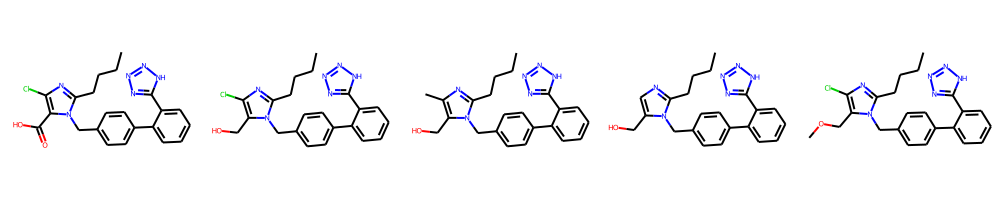

In [4]:
# Load the molecules
molecules = Chem.SmilesMolSupplier('../data/molecules.smi',delimiter='\t',titleLine=False)
print(f"{len(molecules)} molecules")
img = Draw.MolsToGridImage(molecules, molsPerRow=5, returnPNG=False)
img

In [5]:
# Create the pharmacophore
pharmacophore = LigandBasedPharmacophore()
# feat_list = ["Aromatic", "Donor"]
feat_def = load_smarts_fdef("../data/feat_defs/smarts_features.txt")
pharmacophore.from_ligand_list(ligands=molecules, method="dbscan", feat_list=None, feat_def=feat_def)
print(pharmacophore)

LigandBasedPharmacophore(n_elements: 6)


In [6]:
# Inspect an element from the pharmacophore
element = pharmacophore.elements[0]
print(element)

HBAcceptorSphere(center: [-0.33936800000000006 0.01559 0.23571799999999998] nanometer; radius: 0.09999999999999999 nanometer)


In [7]:
pharmacophore.show()

NGLWidget()

## Pharmacophore from other file formats

#### Load from mol2 file

In [8]:
fname = "../data/pharmagist_mols/ace.mol2"
mols = load_mol2_file(fname)
print("{} molecules".format(len(mols)))

3 molecules


In [9]:
mols = [generate_conformers(m, 1, random_seed=1) for m in mols]
view_ligands(mols)

NGLWidget()

#### Load from sdf file

In [10]:
sdf_mols = Chem.SDMolSupplier("../data/abl1/actives_final.sdf")
print(len(sdf_mols))

295
